### EN3160 - Assignment 03 on Neural Networks

Listing 1 shows the code for a single dense layer network with manually computed forward path and
backpropagations. Do the following changes

In [18]:
#importing the libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [19]:
# Data loading
transform = transforms . Compose ([transforms.ToTensor ( ),transforms.Normalize ((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True , transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True , num_workers=2)
testset = torchvision.datasets.CIFAR10(root= './data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size, shuffle=False , num_workers=2)
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified


KeyboardInterrupt: 

In [ ]:
#Define the network parameters

Din = 3*32*32 #Input size(flattened CIFAR=10 image size)
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5

In [ ]:
# Initialize weights and biases
w = torch.randn(Din,K)*std # One layer: directly map input to output
b = torch.zeros(K)

In [ ]:
# Hyperparameters
iterations = 20
lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = []

In [ ]:
# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot
        
        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation
        
        # Loss calculation (Mean Squared Error with regularization)
        loss = (1/Ntr) * torch.sum((y_pred - y_train_onehot)**2) + reg * torch.sum(w**2)
        loss_history.append(loss.item())
        running_loss += loss.item()
        
        # Backpropagation
        dy_pred = (2.0/Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)
        
        # Parameter update
        w -= lr * dw
        b -= lr * db
    
    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss/len(trainloader)}")
    
    # Learning rate decay
    lr *= lr_decay

Epoch 1/20, Loss: 0.9768999246954918
Epoch 2/20, Loss: 0.949816585958004
Epoch 3/20, Loss: 0.9360892215967178
Epoch 4/20, Loss: 0.9275374981760979
Epoch 5/20, Loss: 0.921600792825222
Epoch 6/20, Loss: 0.9171961472034454
Epoch 7/20, Loss: 0.91378219550848
Epoch 8/20, Loss: 0.9110555956363678
Epoch 9/20, Loss: 0.9088272545337677
Epoch 10/20, Loss: 0.9069749351143837
Epoch 11/20, Loss: 0.9054148879647255
Epoch 12/20, Loss: 0.9040877311229706
Epoch 13/20, Loss: 0.9029495259523391
Epoch 14/20, Loss: 0.9019661424160004
Epoch 15/20, Loss: 0.901112111210823
Epoch 16/20, Loss: 0.9003673402071
Epoch 17/20, Loss: 0.8997147098779679
Epoch 18/20, Loss: 0.8991412872672081
Epoch 19/20, Loss: 0.8986358432769775
Epoch 20/20, Loss: 0.8981893296241761


In [ ]:
#4. Plotting the Loss History
plt. plot (loss_history)
plt. title ("LossHistory")
plt.xlabel ("Iteration")
plt.ylabel ("Loss")
plt.show()

In [ ]:
 # 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr,-1)
        y_train_onehot = nn.functional.one_hot(labels,K).float()

        # Forward pass
        y_train_pred = x_train.mm(w)+b
        predicted_train = torch.argmax(y_train_pred , dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train/total_train
print(f"Training accuracy : { train_acc :.2f}%")

In [ ]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()
        
        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels . size (0)
        correct_test += (predicted_test == labels ).sum(). item()
test_acc = 100 * correct_test / total_test
print( f"Test accuracy : {test_acc:.2f}%")

Adding 100 dense layers

In [ ]:
# Define the number of hidden nodes and output classes
H = 100  # Number of hidden nodes
K = 10   # Output dimension (number of classes)

lr = 0.01
lr_decay = 0.99
reg = 1e-5
iterations = 20  # Number of epochs
loss_history = []

# Initialize weights and biases based on the first batch to get input dimension
dataiter = iter(trainloader)
inputs, labels = next(dataiter)
Ntr = inputs.shape[0]  # Batch size
Din = inputs.view(Ntr, -1).shape[1]  # Input dimension (flattened image size)

# Initialize weights and biases for input to hidden layer
w1 = torch.randn(Din, H) * 0.01  # Input to hidden layer weights
b1 = torch.zeros(H)  # Hidden layer bias

# Initialize weights and biases for hidden to output layer
w2 = torch.randn(H, K) * 0.01  # Hidden to output layer weights
b2 = torch.zeros(K)  # Output layer bias

# Training loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels from the current batch
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding
        
        # Forward pass
        # Input to hidden layer
        hidden = x_train.mm(w1) + b1  # (Ntr, H)
        hidden_activated = torch.sigmoid(hidden)  # Apply sigmoid activation
        
        # Hidden to output layer
        y_pred = hidden_activated.mm(w2) + b2  # Output layer activation
        
        # Loss calculation (Mean Squared Error with regularization)
        loss = (1/Ntr) * torch.sum((y_pred - y_train_onehot)**2) + reg * (torch.sum(w1**2) + torch.sum(w2**2))
        loss_history.append(loss.item())
        running_loss += loss.item()
        
        # Backpropagation
        # Gradients for output layer
        dy_pred = (2.0/Ntr) * (y_pred - y_train_onehot)  # (Ntr, K)
        dw2 = hidden_activated.t().mm(dy_pred) + reg * w2  # (H, K)
        db2 = dy_pred.sum(dim=0)  # (K,)
        
        # Gradients for hidden layer
        dhidden_activated = dy_pred.mm(w2.t())  # (Ntr, H)
        dhidden = dhidden_activated * (hidden_activated * (1 - hidden_activated))  # Sigmoid derivative
        
        dw1 = x_train.t().mm(dhidden) + reg * w1  # (Din, H)
        db1 = dhidden.sum(dim=0)  # (H,)
        
        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2
    
    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss/len(trainloader)}")
    
    # Learning rate decay
    lr *= lr_decay


Epoch 1/20, Loss: 0.9850227440595627
Epoch 2/20, Loss: 0.9698836977481842
Epoch 3/20, Loss: 0.9585983777046203
Epoch 4/20, Loss: 0.9500242816209793
Epoch 5/20, Loss: 0.9433983385562896
Epoch 6/20, Loss: 0.9381982617974282
Epoch 7/20, Loss: 0.9340606674551963
Epoch 8/20, Loss: 0.9307274643182755
Epoch 9/20, Loss: 0.9280119529962539
Epoch 10/20, Loss: 0.9257774292826653
Epoch 11/20, Loss: 0.9239222972393036
Epoch 12/20, Loss: 0.92236958193779
Epoch 13/20, Loss: 0.9210605772733689
Epoch 14/20, Loss: 0.9199497598409653
Epoch 15/20, Loss: 0.9190015568733215
Epoch 16/20, Loss: 0.9181880221366883
Epoch 17/20, Loss: 0.9174866504669189
Epoch 18/20, Loss: 0.9168794072270393
Epoch 19/20, Loss: 0.9163516188859939
Epoch 20/20, Loss: 0.9158912871479988


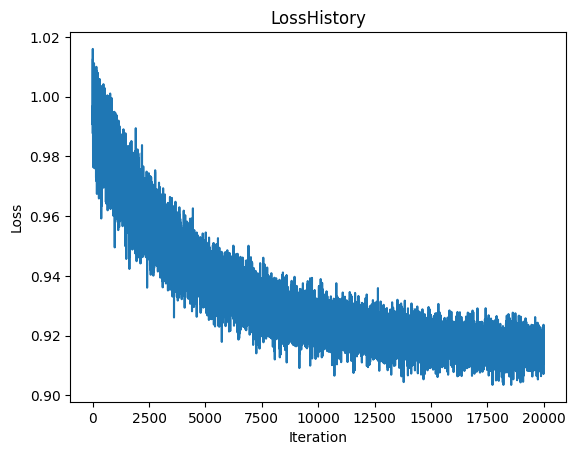

In [ ]:
#4. Plotting the Loss History
plt. plot (loss_history)
plt. title ("LossHistory")
plt.xlabel ("Iteration")
plt.ylabel ("Loss")
plt.show()

In [ ]:
 # 5. Calculate Accuracy on Training Set

correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr,-1)
        y_train_onehot = nn.functional.one_hot(labels,K).float()

        # Forward pass
        y_train_pred = x_train.mm(w)+b
        predicted_train = torch.argmax(y_train_pred , dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train/total_train
print(f"Training accuracy : { train_acc :.2f}%")

Training accuracy : 32.23%


In [ ]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()
        
        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels . size (0)
        correct_test += (predicted_test == labels ).sum(). item()
test_acc = 100 * correct_test / total_test
print( f"Test accuracy : {test_acc:.2f}%")

Test accuracy : 32.40%


Adding Cross-Entropy Loss

In [ ]:
# Define the number of hidden nodes and output classes
H = 100  # Number of hidden nodes
K = 10   # Output dimension (number of classes)

# Learning rate and regularization parameters
lr = 0.01
lr_decay = 0.99
reg = 1e-5
iterations = 10  # Number of epochs
loss_history = []

# Initialize weights and biases based on the first batch to get input dimension
dataiter = iter(trainloader)
inputs, labels = next(dataiter)
Ntr = inputs.shape[0]  # Batch size
Din = inputs.view(Ntr, -1).shape[1]  # Input dimension (flattened image size)

# Initialize weights and biases for input to hidden layer
w1 = torch.randn(Din, H) * 0.01  # Input to hidden layer weights
b1 = torch.zeros(H)  # Hidden layer bias

# Initialize weights and biases for hidden to output layer
w2 = torch.randn(H, K) * 0.01  # Hidden to output layer weights
b2 = torch.zeros(K)  # Output layer bias

# Training loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels from the current batch
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        
        # Forward pass
        # Input to hidden layer
        hidden = x_train.mm(w1) + b1  # (Ntr, H)
        hidden_activated = torch.sigmoid(hidden)  # Apply sigmoid activation
        
        # Hidden to output layer
        logits = hidden_activated.mm(w2) + b2  # Output layer (logits)

        # Apply softmax to get probabilities (not necessary for Cross Entropy Loss in PyTorch, but useful for understanding)
        probs = torch.softmax(logits, dim=1)
        
        # Cross Entropy Loss calculation
        # Using PyTorch's built-in log-sum-exp trick for numerical stability
        log_probs = torch.log_softmax(logits, dim=1)  # Log probabilities
        # Loss calculation (Cross Entropy with regularization)
        loss = -log_probs[range(Ntr), labels].mean() + reg * (torch.sum(w1**2) + torch.sum(w2**2))
        
        loss_history.append(loss.item())
        running_loss += loss.item()
        
        # Backpropagation
        # Gradients for output layer (Cross Entropy derivative)
        dy_pred = probs  # Predicted probabilities
        dy_pred[range(Ntr), labels] -= 1  # Subtract 1 from the true class
        dy_pred /= Ntr  # Normalize the gradient
        
        dw2 = hidden_activated.t().mm(dy_pred) + reg * w2  # (H, K)
        db2 = dy_pred.sum(dim=0)  # (K,)
        
        # Gradients for hidden layer
        dhidden_activated = dy_pred.mm(w2.t())  # (Ntr, H)
        dhidden = dhidden_activated * (hidden_activated * (1 - hidden_activated))  # Sigmoid derivative
        
        dw1 = x_train.t().mm(dhidden) + reg * w1  # (Din, H)
        db1 = dhidden.sum(dim=0)  # (H,)
        
        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2
    
    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss/len(trainloader)}")
    
    # Learning rate decay
    lr *= lr_decay


KeyboardInterrupt: 

In [ ]:
#4. Plotting the Loss History
plt. plot (loss_history)
plt. title ("LossHistory")
plt.xlabel ("Iteration")
plt.ylabel ("Loss")
plt.show()

In [ ]:
#5. Calculate Accuracy on Training Set

correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr,-1)
        y_train_onehot = nn.functional.one_hot(labels,K).float()

        # Forward pass
        y_train_pred = x_train.mm(w)+b
        predicted_train = torch.argmax(y_train_pred , dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train/total_train
print(f"Training accuracy : { train_acc :.2f}%")

In [ ]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()
        
        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels . size (0)
        correct_test += (predicted_test == labels ).sum(). item()
test_acc = 100 * correct_test / total_test
print( f"Test accuracy : {test_acc:.2f}%")